In [99]:
genome = ''.join(line.strip() for line in open('lambda_virus.fa') if not line.startswith('>'))
print len(genome)

48502


In [100]:
import collections
collections.Counter(genome)

Counter({'A': 12334, 'C': 11362, 'G': 12820, 'T': 11986})

In [101]:
def reverseComplement(seq):
    return ''.join({'A':'T','C':'G','G':'C','T':'A','N':'N'}[c] for c in seq[::-1])

In [102]:
def isMatchAt(genome, fragment, offset, maxMismatches = 0):
    misMatches = []
    for i in range(len(fragment)):
        if genome[offset + i] != fragment[i]:
            misMatches.append(i)
            if len(misMatches) > maxMismatches:
                break
    return len(misMatches) <= maxMismatches

def getMatches(genome, fragment, maxMismatches):
    matches = []
    for i in range(len(genome) - len(fragment) + 1):
        misMatches = getMismatches(genome, fragment, offset)
        if isMatchAt(genome, fragment, i, maxMismatches):
            matches.append(i)
    return matches

def getAllMatches(genome, fragment, maxMismatches = 0):
    matches = getMatches(genome, fragment, maxMismatches)
    rc = reverseComplement(fragment)
    rcMatches = getMatches(genome, rc, maxMismatches) if rc != fragment else []
    return matches, rcMatches

In [104]:
genome[36382:36382+4]

'GTTC'

In [105]:
map(len, getAllMatches(genome,'AGGT'))

[150, 156]

In [106]:
map(len, getAllMatches(genome,'TTAA'))

[195, 0]

In [107]:
reverseComplement('TTAA')

'TTAA'

In [108]:
print getAllMatches(genome, 'ACTAAGT')

([27733, 45382], [26028])


In [109]:
print getAllMatches(genome, 'AGTCGA', 0)

([18005, 23320, 33657, 44806], [450, 1908, 2472, 41927, 45369])


In [110]:
print getAllMatches('ACTTACTTGATAAAGT', 'ACTTTA', 2)

([0, 4], [10])


In [111]:
print len(getAllMatches(genome, 'TTCAAGCC', 2)[0])

191


In [145]:
print getAllMatches(genome, 'AGGAGGTT', 2)[0]

[49, 282, 299, 302, 380, 1560, 1650, 2235, 2277, 2400, 2562, 2565, 2729, 2823, 3160, 3181, 3946, 4210, 4294, 4309, 4405, 4580, 5069, 5159, 5189, 5231, 5331, 5519, 5737, 5882, 5993, 5996, 6011, 6312, 6522, 6585, 6606, 7316, 7394, 7819, 7904, 7966, 7998, 8534, 8648, 8946, 9339, 9354, 9530, 9842, 9966, 10041, 10250, 10416, 10445, 10484, 10527, 10874, 11193, 11292, 11505, 11568, 11655, 11745, 11838, 12078, 12180, 12222, 12697, 12745, 12819, 12880, 12935, 13011, 13087, 13256, 13415, 13526, 13813, 14259, 15385, 15473, 16192, 17101, 17437, 17755, 17936, 17989, 18016, 18040, 18727, 18853, 18911, 19232, 19263, 19310, 19833, 19929, 19932, 19947, 19980, 20793, 20802, 21305, 21528, 21627, 21684, 22414, 22660, 22670, 22787, 23326, 24063, 24145, 24409, 24595, 24681, 25120, 25139, 25210, 25381, 25384, 25648, 25664, 25773, 25987, 26196, 26208, 26576, 26587, 26653, 26736, 27892, 27967, 28042, 28622, 28840, 28976, 29119, 30029, 30530, 30673, 30902, 31619, 31645, 31682, 31843, 31859, 32069, 33180, 33365,

In [113]:
def charToQual(c):
    return ord(c) - 33

def loadFastq(filename):
    reads = []
    quals = []
    with open(filename) as f:
        while True:
            id_line = f.readline().rstrip()
            if not id_line:
                break
            assert id_line.startswith('@')
            reads.append(f.readline().rstrip())
            assert f.readline().rstrip() == '+'
            quals.append(map(charToQual, f.readline().rstrip()))
            assert len(reads[-1]) == len(quals[-1])
    return reads, quals

In [114]:
r,q = loadFastq('ERR037900_1.first1000.fastq')

In [115]:
len(r)

1000

In [116]:
print q[0]

[39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 38, 37, 39, 39, 39, 37, 39, 37, 37, 39, 39, 39, 39, 39, 38, 39, 39, 37, 39, 36, 39, 31, 19, 2, 20, 20, 20, 20, 19, 19, 20, 20, 39, 38, 37, 33, 37, 27, 31, 34, 29, 22, 36, 36, 37, 31, 37, 33, 36, 35, 35, 35, 27, 28, 34, 27, 36]


In [117]:
import numpy as n

In [132]:
q = n.array(q)

In [119]:
import matplotlib.pyplot as plt

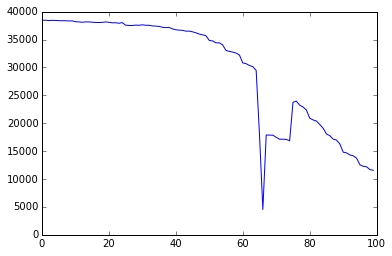

In [133]:
plt.plot(q.sum(0))

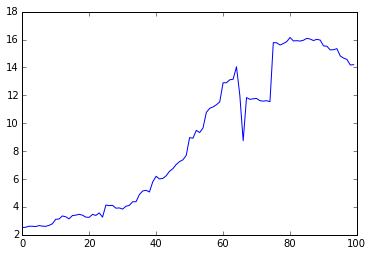

In [139]:
plt.plot(q.std(0))

In [141]:
q.sum(0).argmin()

66

In [144]:
q.sum(0)[62:72]

array([30343, 30131, 29463, 17891,  4526, 17881, 17865, 17852, 17466, 17131])

There is a clearly lower quality value at index 66.

I'm going to do another analysis now, by seeing which indices in the reads most frequently cause a mismatch.

In [3]:
x=set()

In [7]:
x.update([1,2,3])

In [8]:
x

{1, 2, 3}